In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
df=pd.read_csv("BankNoteAuthentication.csv")
df.head()
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


<Axes: xlabel='variance'>

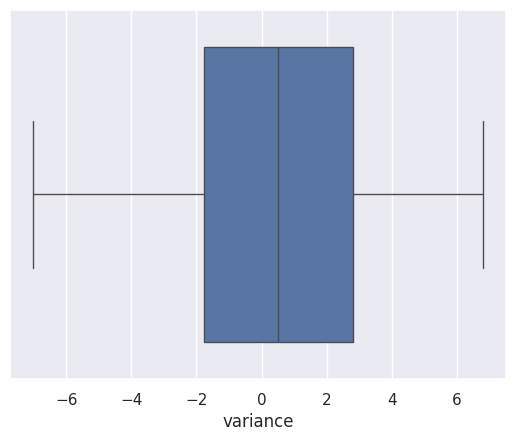

In [ ]:
sns.boxplot(x=df["variance"])

<Axes: xlabel='skewness'>

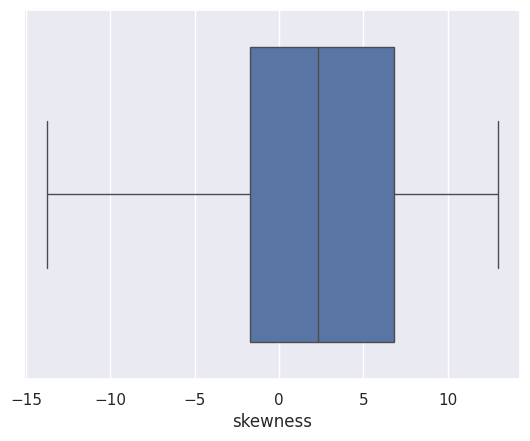

In [ ]:
sns.boxplot(x=df["skewness"])

<Axes: xlabel='curtosis'>

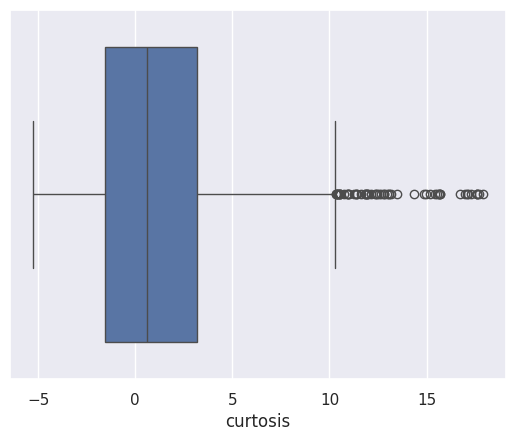

In [ ]:
sns.boxplot(x=df["curtosis"])

<Axes: xlabel='entropy'>

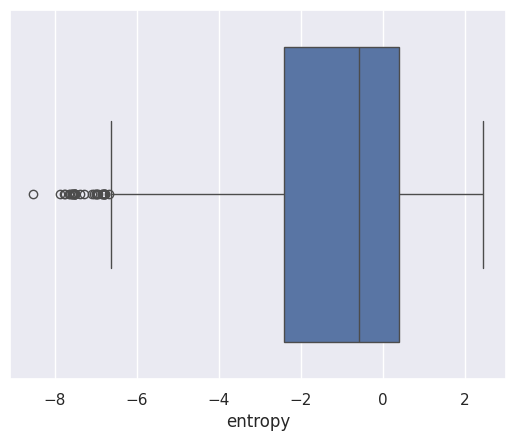

In [ ]:
sns.boxplot(x=df["entropy"])

In [ ]:
import scipy.stats as stats
z=np.abs(stats.zscore(df))
data_clean=df[(z<2).all(axis=1)]  #z-score outlier removal is done because to avoid the unusual value for the model to be deviated
data_clean.shape

(1210, 5)

,count
class,
0,727
1,483


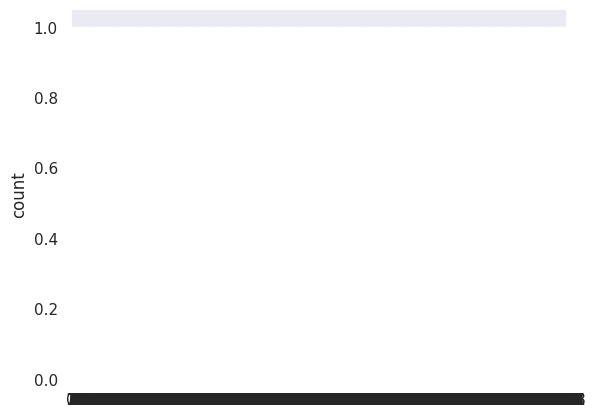

In [ ]:
#counting 0 and 1 valuein class column
sns.countplot(data_clean['class'])
data_clean['class'].value_counts()# 0 means orginal note 1 means fake note


In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority=data_clean[(data_clean['class']==0)]
df_minority=data_clean[(data_clean['class']==1)]
#upsample minority class
df_minority_upsampled=resample(df_minority,
                               replace=True,
                               n_samples=727,
                               random_state=42)
#combine majority class with unsampled minority class
data_clean2=pd.concat([df_minority_upsampled,df_majority])

,count
class,
1,727
0,727


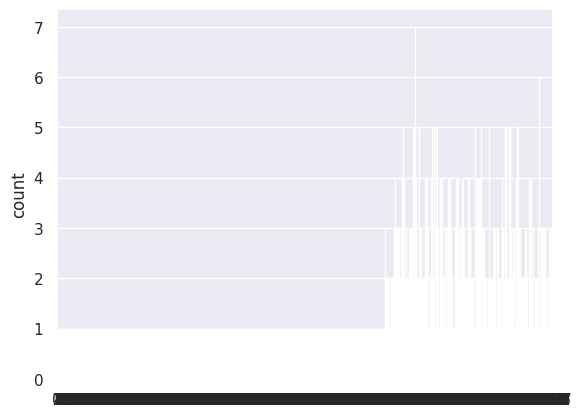

In [ ]:
#Counting 1 and 0 Value in class column
sns.countplot(data_clean2['class'])
data_clean2['class'].value_counts()

<Axes: >

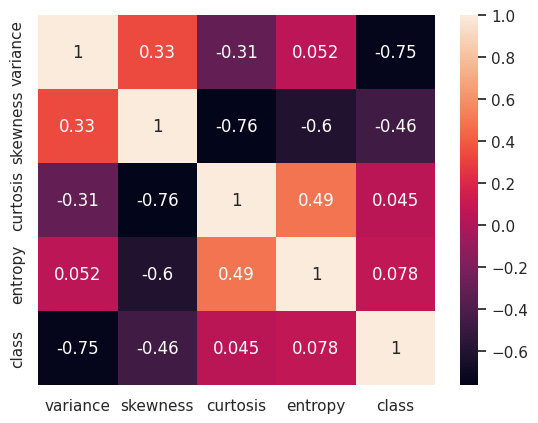

In [ ]:
sns.heatmap(data_clean2.corr(),annot=True)

In [ ]:
x=data_clean2.drop("class",axis=1)
y=data_clean2["class"]
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.metrics import accuracy_score

In [ ]:
#Descision Tree
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dtree.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test ,y_pred)*100,2),"%")

Accuracy Score: 98.63 %


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score: 99.31 %


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=xgb.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2),"%")  #(number of correct pred)/(number of total pred)

Accuracy Score: 99.31 %


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score: 99.31 %
